In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
df = pd.read_csv('final1_df.csv')
df

make  model  vehicle_class  engine_size  cylinders  transmission  \
0        0   1057              0          2.0          4             2   
1        0   1057              0          2.4          4             4   
2        0   1058              0          1.5          4             3   
3        0   1233             11          3.5          6             2   
4        0   1499             11          3.5          6             2   
...    ...    ...            ...          ...        ...           ...   
6268    41   1951             11          2.0          4             2   
6269    41   1957             11          2.0          4             2   
6270    41   1960             11          2.0          4             2   
6271    41   1968             12          2.0          4             2   
6272    41   1969             12          2.0          4             2   

      fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0             4                    9.9                   6.7   
1             4                   11.2                   7.7   
2             4                    6.0                   5.8   
3             4                   12.7                   9.1   
4             4                   12.1                   8.7   
...         ...                    ...                   ...   
6268          4                   10.7                   7.7   
6269          4                   11.2                   8.3   
6270          4                   11.7                   8.6   
6271          4                   11.2                   8.3   
6272          4                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
6268                             9.4                          30   
6269                             9.9                          29   
6270                            10.3                          27   
6271                             9.9                          29   
6272                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
6268            219  
6269            232  
6270            240  
6271            232  
6272            248  

[6273 rows x 12 columns]

## Removing outliers

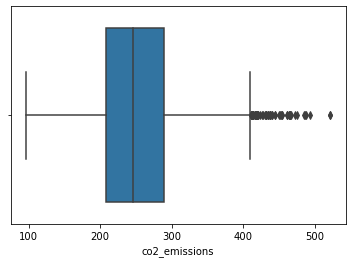

In [4]:
sns.boxplot(df['co2_emissions']);

In [5]:
percentile25 = df['co2_emissions'].quantile(0.25)
percentile75 = df['co2_emissions'].quantile(0.75)
print(percentile25)
print(percentile75)

208.0
289.0


In [6]:
iqr = 289-208
iqr

81

In [7]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [8]:
#finding outliers
df[df['co2_emissions']>upper_limit] 

make  model  vehicle_class  engine_size  cylinders  transmission  \
75       4   1261              2          6.8          8             2   
223      9    810             15          4.8          8             0   
224      9    810             15          6.0          8             0   
225      9    810             15          6.0          8             0   
226      9    812             15          4.8          8             0   
...    ...    ...            ...          ...        ...           ...   
4891     6    655             13          8.0         16             1   
5286    20   1032             12          6.2          8             0   
5321    22    391             13          6.5         12             1   
5322    22    392             13          6.5         12             1   
6112    22    391             13          6.5         12             1   

      fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
75            4                   22.3                  14.9   
223           3                   21.1                  14.2   
224           3                   21.9                  15.0   
225           1                   30.0                  20.4   
226           3                   21.3                  14.3   
...         ...                    ...                   ...   
4891          4                   26.8                  16.6   
5286          4                   20.9                  13.8   
5321          4                   26.3                  15.6   
5322          4                   26.6                  15.8   
6112          4                   26.2                  15.5   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
75                              19.0                          15   
223                             18.0                          16   
224                             18.8                          15   
225                             25.7                          11   
226                             18.2                          16   
...                              ...                         ...   
4891                            22.2                          13   
5286                            17.7                          16   
5321                            21.5                          13   
5322                            21.7                          13   
6112                            21.4                          13   

      co2_emissions  
75              437  
223             414  
224             432  
225             411  
226             419  
...             ...  
4891            522  
5286            413  
5321            487  
5322            493  
6112            485  

[74 rows x 12 columns]

In [9]:
df[df['co2_emissions']<lower_limit]

Empty DataFrame
Columns: [make, model, vehicle_class, engine_size, cylinders, transmission, fuel_type, fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_comb(l/100km), fuel_consumption_comb(mpg), co2_emissions]
Index: []

In [10]:
#removing
df1 = df[df['co2_emissions'] < upper_limit]
print(df.shape)
print(df1.shape)

(6273, 12)
(6199, 12)


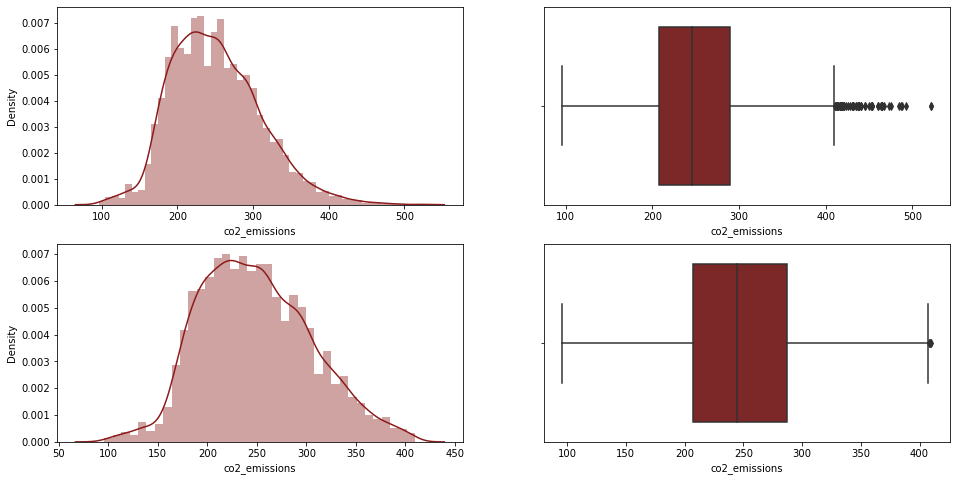

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['co2_emissions'],color='#8B1A1A')
plt.subplot(2,2,2)
sns.boxplot(df['co2_emissions'],color='#8B1A1A')
plt.subplot(2,2,3)
sns.distplot(df1['co2_emissions'],color='#8B1A1A')
plt.subplot(2,2,4)
sns.boxplot(df1['co2_emissions'],color='#8B1A1A')
plt.show();

In [42]:
#df1.to_csv('for_mb.csv',index=False)

***

## Feature Selection.


In [12]:
x = df1.drop('co2_emissions',axis = 1)
y = df1['co2_emissions']

In [13]:
import plotly.express as px

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [15]:
model.feature_importances_

array([0.06941238, 0.12792609, 0.06169893, 0.06106357, 0.01686575,
       0.05261851, 0.03035072, 0.15358747, 0.16058358, 0.18329015,
       0.08260286])

In [16]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features = pd.DataFrame(ranked_features,columns=['Scores'])
ranked_features

Scores
make                            0.069412
model                           0.127926
vehicle_class                   0.061699
engine_size                     0.061064
cylinders                       0.016866
transmission                    0.052619
fuel_type                       0.030351
fuel_consumption_city           0.153587
fuel_consumption_hwy            0.160584
fuel_consumption_comb(l/100km)  0.183290
fuel_consumption_comb(mpg)      0.082603

In [17]:
ranked_features.Scores.sum()

1.0

In [18]:
fig = px.bar(ranked_features,x=ranked_features.index,y='Scores',color='Scores')
fig.update_layout(
    title='Feature Importance',
    xaxis=dict(
          title='Features',
          titlefont_size=16,
          tickfont_size=14,)
    ,
    yaxis=dict(
        title='Scores (%)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()


In [19]:
# plotting  pie chart
fig = px.pie(ranked_features,values='Scores',names=ranked_features.index,color='Scores',
             title="Pie Chart for Feature Importance.")
fig.show()

## Plotting Residual plots

In [20]:
cols=['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)']

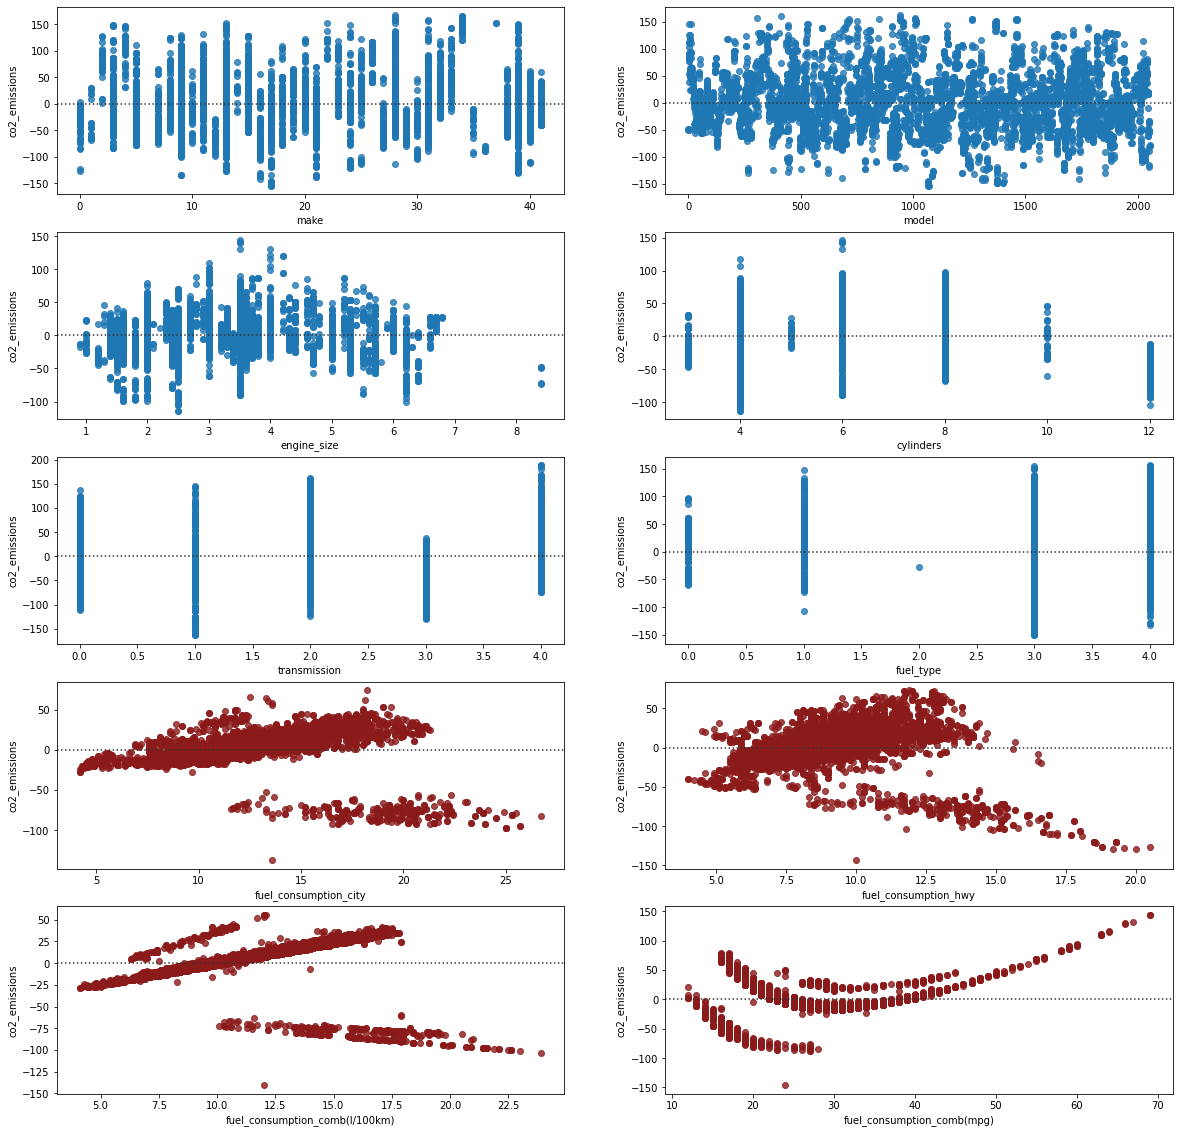

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.residplot(x['make'],y=y)
plt.subplot(5,2,2)
sns.residplot(x['model'],y=y)
plt.subplot(5,2,3)
sns.residplot(x['engine_size'],y=y)
plt.subplot(5,2,4)
sns.residplot(x['cylinders'],y=y)
plt.subplot(5,2,5)
sns.residplot(x['transmission'],y=y)
plt.subplot(5,2,6)
sns.residplot(x['fuel_type'],y=y)
plt.subplot(5,2,7)
sns.residplot(x['fuel_consumption_city'],y=y,color='#8B1A1A')
plt.subplot(5,2,8)
sns.residplot(x['fuel_consumption_hwy'],y=y,color='#8B1A1A')
plt.subplot(5,2,9)
sns.residplot(x['fuel_consumption_comb(l/100km)'],y=y,color='#8B1A1A')
plt.subplot(5,2,10)
sns.residplot(x['fuel_consumption_comb(mpg)'],y=y,color='#8B1A1A');

- The Last four columns doesn't follow Homoscedasticity,an assumption for linear Regression.
- Either we can transform them or don't use them in model building.

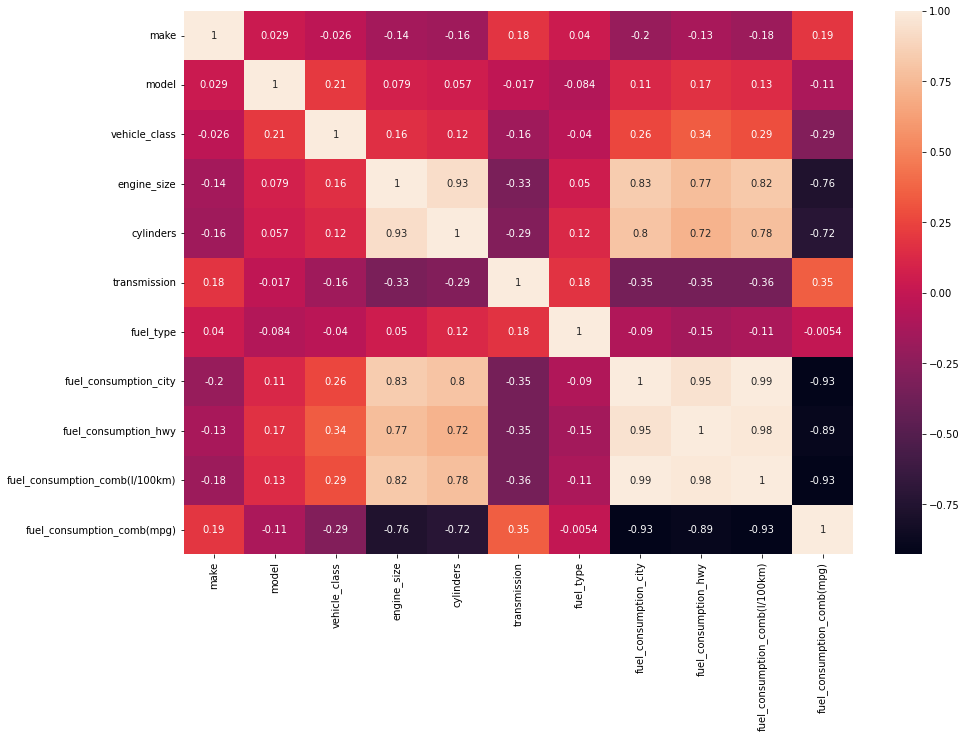

In [22]:
corr=df.iloc[:,:-1].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True);

In [23]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
correlation(df.iloc[:,:-1],0.80)

{'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_comb(mpg)',
 'fuel_consumption_hwy'}

### These five are highly correlated more than 80%. keeping only one of these makes sense.

---

In [25]:
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [26]:
def basic_model(Model,X_TRAIN,X_TEST,Y_TRAIN,Y_TEST):
    model = Model
    model.fit(X_TRAIN,Y_TRAIN)
    a=r2_score(Y_TRAIN,model.predict(X_TRAIN))
    b=np.sqrt(mean_squared_error(Y_TRAIN,model.predict(X_TRAIN)))
    c=r2_score(Y_TEST,model.predict(X_TEST))
    d=np.sqrt(mean_squared_error(Y_TEST,model.predict(X_TEST)))
    x=Y_TEST
    y=model.predict(X_TEST)
    e=sns.residplot(x,y);
    #h = sns.distplot(x-y);
    return(e,print(f" The r2score for train data is {a}.\n The RMSE value is {b}. \n The r2score for the test data is {c}. \n The RMSE value is {d}."))

In [27]:
def distribution_of_residuals(Model,X_TRAIN,X_TEST,Y_TRAIN,Y_TEST):
    model = Model
    model.fit(X_TRAIN,Y_TRAIN)
    x=Y_TEST
    y=model.predict(X_TEST)
    h = sns.distplot(x-y);
    return h

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15,random_state=4)

In [29]:
print(x_train.shape
      ,x_test.shape
      ,y_train.shape
      ,y_test.shape)

(5269, 11) (930, 11) (5269,) (930,)


***

### Model with all the columns.

 The r2score for train data is 0.9151339473830211.
 The RMSE value is 16.334770536808033. 
 The r2score for the test data is 0.9210429299521086. 
 The RMSE value is 15.303414362770885.


(<AxesSubplot:xlabel='co2_emissions'>, None)

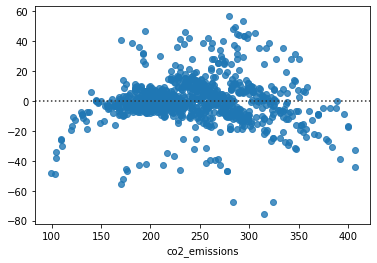

In [30]:
model_with_all_columns=basic_model(LinearRegression(),x_train,x_test,y_train,y_test)
model_with_all_columns

- The train accuracy is 0.9150 and RMSE is 17.26 .
- The Test accuracy is 0.9186 and RMSE is 16.87 . 
- The Variance of the Residuals is not constant.

**<font color='	#8B3A3A'>The model becomes underfitted while using all the features.</font>**

---

In [31]:
x_train1=x_train.drop(['fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city'],axis=1)
x_test1=x_test.drop(['fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city'],axis=1)

### model with features listed below:
- make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(l/100km)
- only 8 features.

 The r2score for train data is 0.8958396850272227.
 The RMSE value is 18.09660800791795. 
 The r2score for the test data is 0.8952206748666639. 
 The RMSE value is 17.62911959415453.


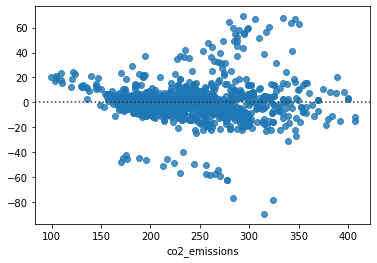

In [32]:
model_with_removed_features=basic_model(LinearRegression(),x_train1,x_test1,y_train,y_test)

- The train accuracy is 0.8958 and RMSE is 18.09 .
- The Test accuracy is 0.8952 and RMSE is 17.62 . 
- The Variance of the Residuals is not constant.

**<font color='	#8B3A3A'>The model seems to work better than the previous one but it's not that significant.</font>**

---

### model with features listed below:
- make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type
- only 7 features.

In [33]:
x_train3=x_train.drop(['fuel_consumption_hwy','fuel_consumption_city','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)'],axis=1)
x_test3=x_test.drop(['fuel_consumption_hwy','fuel_consumption_city','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)'],axis=1)

 The r2score for train data is 0.7691714185498222.
 The RMSE value is 26.939580476320504. 
 The r2score for the test data is 0.7593180229262753. 
 The RMSE value is 26.718656135380552.


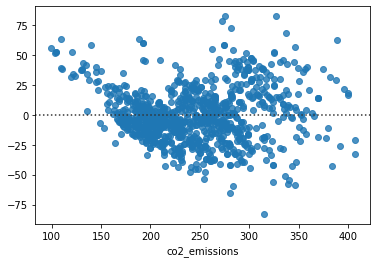

In [34]:
model_with_removed_features2=basic_model(LinearRegression(),x_train3,x_test3,y_train,y_test)



**<font color='	#8B3A3A'>This model doesn't work good without `'fuel_consumption_comb(l/100km)'` this feature.</font>**

---

### model with features listed below:
- make,model,vehicle_class,engine_size,transmission,fuel_type,fuel_consumption_comb(l/100km).
- only 7 features.

In [35]:
x_train2=x_train.drop(['fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)
x_test2=x_test.drop(['fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)

 The r2score for train data is 0.8933892277358223.
 The RMSE value is 18.30823935536618. 
 The r2score for the test data is 0.8921237809644703. 
 The RMSE value is 17.887748649666907.


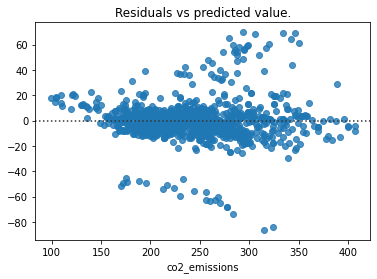

In [36]:
model_with_removed_features1=basic_model(LinearRegression(),x_train2,x_test2,y_train,y_test)
plt.title("Residuals vs predicted value.");

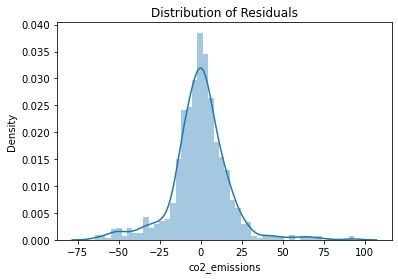

In [37]:
distribution_of_residuals(LinearRegression(),x_train2,x_test2,y_train,y_test)
plt.title("Distribution of Residuals");


- An assumption for linear regression is that errors are independent and normally distributed.


 **<font color='	#8B3A3A'> This model is  good than the previous one.The Residuals are also normally distributed.</font>**

***

### model with features listed below:
- model,vehicle_class,engine_size,transmission,fuel_type,fuel_consumption_comb(l/100km).
- only 6 features.

In [38]:
x_train_WO_make=x_train.drop(['make','fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)
x_test_WO_make=x_test.drop(['make','fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)

 The r2score for train data is 0.8933320695349438.
 The RMSE value is 18.313146578976603. 
 The r2score for the test data is 0.8921917069384488. 
 The RMSE value is 17.882116110409616.


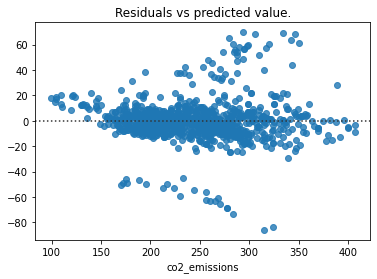

In [39]:
model_with_make_removed=basic_model(LinearRegression(),x_train_WO_make,x_test_WO_make,y_train,y_test)
plt.title("Residuals vs predicted value.");


 **<font color='	#8B3A3A'> The results are very similar to the previous model where we used `make` feature , so this feature also doesn't contribute much.</font>**

---

### model with features listed below:
- make,vehicle_class,engine_size,transmission,fuel_type,fuel_consumption_comb(l/100km).
- only 6 features.

 The r2score for train data is 0.8933509919611251.
 The RMSE value is 18.31152217072039. 
 The r2score for the test data is 0.8921454390923532. 
 The RMSE value is 17.88595291285679.


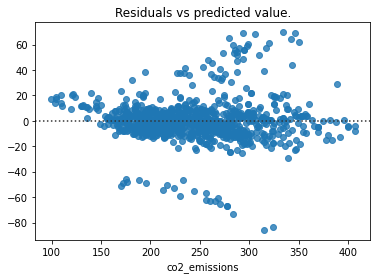

In [40]:
x_train_WO_model=x_train.drop(['model','fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)
x_test_WO_model=x_test.drop(['model','fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)
model_with_model_removed=basic_model(LinearRegression(),x_train_WO_model,x_test_WO_model,y_train,y_test)
plt.title("Residuals vs predicted value.");

 **<font color='#8B3A3A'> It seems that model feature also doesn't have an impact on the target feature.</font>**

---

### model with features listed below:
- vehicle_class,engine_size,transmission,fuel_type,fuel_consumption_comb(l/100km).
- only 5 features.

 The r2score for train data is 0.8932898815093043.
 The RMSE value is 18.316767719450663. 
 The r2score for the test data is 0.8922102180687436. 
 The RMSE value is 17.880580827815006.


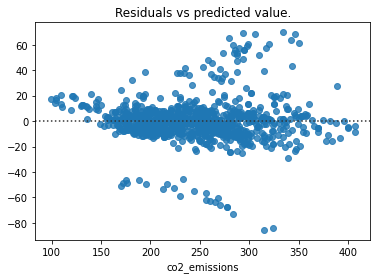

In [41]:
x_train_WO=x_train.drop(['model','make','fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)
x_test_WO=x_test.drop(['model','make','fuel_consumption_comb(mpg)','fuel_consumption_hwy','fuel_consumption_city','cylinders'],axis=1)
model_with_only_5_features=basic_model(LinearRegression(),x_train_WO,x_test_WO,y_train,y_test)
plt.title("Residuals vs predicted value.");

 **<font color='#8B3A3A'> This feature also doesn't have any huge impact on the target,and also there is some sort of Heteroscedasticity.</font>**

---

# Conclusion.

- We think that using the below features is the best solutions as it will reduce the complexity of model and also it gave the best results.
1. make
2. model
3. vehicle_class
4. engine_size
5. transmission
6. fuel_type
7. fuel_consumption_comb(l/100km).
8. Cylinders.

-----------------------------------------------------------------------------------------------------------